In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [53]:
# Define the directory containing the CSV files
directory = ""


csv_files = [f for f in os.listdir(directory)]
df_list = []
for file in csv_files:
    df = pd.read_csv(os.path.join(directory, file), dtype = 'str')
    df["Source_File"] = file 
    df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)
merged_df.to_csv(os.path.join(directory, "merged_All.csv"), index=False)

print(f"Merged {len(csv_files)} files into merged_Final.csv")

Merged 64 files into merged_Final.csv


In [ ]:
import os
import glob
import pandas as pd

def merge_csv_files(root_dir, keyword="All_Tweets"):
    csv_files = glob.glob(os.path.join(root_dir, "**", f"*{keyword}*.csv"), recursive=True)
    
    dataframes = []
    for file in csv_files:
        try:
            df = pd.read_csv(file, engine="python", on_bad_lines="skip", encoding="utf-8", dtype = 'str')
            dataframes.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")

    if dataframes:
        merged_df = pd.concat(dataframes, ignore_index=True)
        return merged_df
    else:
        print("No matching CSV files found.")
        return None


directory_path = ""  # Change this to your actual directory path
merged_dataframe = merge_csv_files(directory_path)


In [64]:
merged_df = pd.read_csv('', dtype = 'str')

In [68]:
valid_df = merged_df.loc[merged_df.Severe_Toxic != -1]

In [70]:
valid_df['tweetid'] = valid_df.Tweet_ID.astype('str')

In [73]:
valid_df_update = pd.merge(valid_df, merged_dataframe)

In [75]:
valid_df_update

Tweet_ID        Toxic  Severe_Toxic    Profanity  \
0         1121624378167271427  0.025674535  0.0026893616  0.023652986   
1         1109578914110820352  0.009361716  0.0018119812  0.016103793   
2         1100939420272869377  0.016712861  0.0012207031  0.013849284   
3         1134172836346695680  0.011058134  0.0016498566   0.01941724   
4         1121624351403417602  0.025674535  0.0026893616  0.023652986   
...                       ...          ...           ...          ...   
59683244   841963491988766720    0.3561489   0.021419114   0.26607355   
59683245   835213288824659968    0.4013387   0.021031776   0.14049543   
59683246   834888273474428928   0.16098402  0.0049209595  0.046922635   
59683247   834921881824174080   0.24924077   0.009307861   0.09868695   
59683248   832257015065964544   0.30993456   0.016060932   0.09034003   

         Identity_Attack        Insult        Threat  \
0           0.0056236745   0.010134893   0.009385503   
1           0.0023493639  0.0070378734  0.0068416605   
2            0.005364689   0.010096892   0.006977591   
3           0.0023678627   0.008348881  0.0065568537   
4           0.0056236745   0.010134893   0.009385503   
...                  ...           ...           ...   
59683244     0.073429056    0.07301756   0.044602267   
59683245      0.10221587    0.26957804   0.033386398   
59683246     0.030691283   0.046764325    0.05753354   
59683247      0.10221587    0.07301756   0.051391184   
59683248      0.37012735    0.06687108   0.039947584   

                                            Source_File              tweetid  \
0           Perspective_Result_Turkey_2020_06_Final.csv  1121624378167271427   
1           Perspective_Result_Turkey_2020_06_Final.csv  1109578914110820352   
2           Perspective_Result_Turkey_2020_06_Final.csv  1100939420272869377   
3           Perspective_Result_Turkey_2020_06_Final.csv  1134172836346695680   
4           Perspective_Result_Turkey_2020_06_Final.csv  1121624351403417602   
...                                                 ...                  ...   
59683244  Perspective_Result_Venezuela_2019_6_Final.csv   841963491988766720   
59683245  Perspective_Result_Venezuela_2019_6_Final.csv   835213288824659968   
59683246  Perspective_Result_Venezuela_2019_6_Final.csv   834888273474428928   
59683247  Perspective_Result_Venezuela_2019_6_Final.csv   834921881824174080   
59683248  Perspective_Result_Venezuela_2019_6_Final.csv   832257015065964544   

                                                userid  ... retweet_tweetid  \
0                                           2383396185  ...    1.121414e+18   
1                                           2383396185  ...    1.109579e+18   
2                                           2383396185  ...    1.100901e+18   
3         T4EKoz1t80S1NTvw0jUvXYcDUdNfGN+KFH0hVY2BSEY=  ...             NaN   
4                                           2383396185  ...    1.121414e+18   
...                                                ...  ...             ...   
59683244   52rzDzLEHAZ+Ho4kyyrAsU3dA28LrLTy5NhmPqIqEM=  ...             NaN   
59683245   52rzDzLEHAZ+Ho4kyyrAsU3dA28LrLTy5NhmPqIqEM=  ...             NaN   
59683246   52rzDzLEHAZ+Ho4kyyrAsU3dA28LrLTy5NhmPqIqEM=  ...             NaN   
59683247   52rzDzLEHAZ+Ho4kyyrAsU3dA28LrLTy5NhmPqIqEM=  ...             NaN   
59683248   52rzDzLEHAZ+Ho4kyyrAsU3dA28LrLTy5NhmPqIqEM=  ...             NaN   

         reply_count  like_count  retweet_count      hashtags  \
0                  0           0              0            []   
1                  0           0              0            []   
2                  0           0              0  ['Colombia']   
3                  0           0              0            []   
4                  0           0              0            []   
...              ...         ...            ...           ...   
59683244         1.0         2.0            3.0            []   
59683245         0.0         1.0         

In [76]:
merged_dataframe.tweetid = merged_dataframe.tweetid.astype('str')

In [79]:
valid_df = valid_df_update

In [80]:
del valid_df_update

In [86]:
valid_df[['Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack','Insult', 'Threat']] = valid_df[['Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack','Insult', 'Threat']].astype(float)

In [94]:
valid_df = valid_df.drop_duplicates('Tweet_ID')

In [95]:
len(valid_df)

56542294

In [97]:
len(valid_df.loc[valid_df.Toxic > 0.5].userid.unique())

14200

In [99]:
valid_df['country'] = valid_df['Source_File'].str.extract(r'^(?:[^_]+_){2}([^_]+)')

/tmp/ipykernel_63636/403173241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['country'] = valid_df['Source_File'].str.extract(r'^(?:[^_]+_){2}([^_]+)')


In [101]:
df_valid_updated = valid_df[['Tweet_ID', 'Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack','Insult', 'Threat', 'country']]

In [103]:
threshold = 0.5

# Check if any of the toxicity-related columns exceed the threshold
df_valid_updated['Overall_toxic'] = df_valid_updated[['Toxic', 'Severe_Toxic', 'Profanity', 
                                                      'Identity_Attack', 'Insult', 'Threat']].max(axis=1) > threshold

# Convert boolean to integer (1 = Toxic, 0 = Non-Toxic)
df_valid_updated['Overall_toxic'] = df_valid_updated['Overall_toxic'].astype(int)

/tmp/ipykernel_63636/990690774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_updated['Overall_toxic'] = df_valid_updated[['Toxic', 'Severe_Toxic', 'Profanity',
/tmp/ipykernel_63636/990690774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_updated['Overall_toxic'] = df_valid_updated['Overall_toxic'].astype(int)


In [106]:
df_valid_updated

Tweet_ID     Toxic  Severe_Toxic  Profanity  \
0         1121624378167271427  0.025675      0.002689   0.023653   
1         1109578914110820352  0.009362      0.001812   0.016104   
2         1100939420272869377  0.016713      0.001221   0.013849   
3         1134172836346695680  0.011058      0.001650   0.019417   
4         1121624351403417602  0.025675      0.002689   0.023653   
...                       ...       ...           ...        ...   
59683244   841963491988766720  0.356149      0.021419   0.266074   
59683245   835213288824659968  0.401339      0.021032   0.140495   
59683246   834888273474428928  0.160984      0.004921   0.046923   
59683247   834921881824174080  0.249241      0.009308   0.098687   
59683248   832257015065964544  0.309935      0.016061   0.090340   

          Identity_Attack    Insult    Threat    country  Overall_toxic  
0                0.005624  0.010135  0.009386     Turkey              0  
1                0.002349  0.007038  0.006842     Turkey              0  
2                0.005365  0.010097  0.006978     Turkey              0  
3                0.002368  0.008349  0.006557     Turkey              0  
4                0.005624  0.010135  0.009386     Turkey              0  
...                   ...       ...       ...        ...            ...  
59683244         0.073429  0.073018  0.044602  Venezuela              0  
59683245         0.102216  0.269578  0.033386  Venezuela              0  
59683246         0.030691  0.046764  0.057534  Venezuela              0  
59683247         0.102216  0.073018  0.051391  Venezuela              0  
59683248         0.370127  0.066871  0.039948  Venezuela              0  

[56542294 rows x 9 columns]

In [115]:
df_valid_updated

Tweet_ID     Toxic  Severe_Toxic  Profanity  \
0         1121624378167271427  0.025675      0.002689   0.023653   
1         1109578914110820352  0.009362      0.001812   0.016104   
2         1100939420272869377  0.016713      0.001221   0.013849   
3         1134172836346695680  0.011058      0.001650   0.019417   
4         1121624351403417602  0.025675      0.002689   0.023653   
...                       ...       ...           ...        ...   
59683244   841963491988766720  0.356149      0.021419   0.266074   
59683245   835213288824659968  0.401339      0.021032   0.140495   
59683246   834888273474428928  0.160984      0.004921   0.046923   
59683247   834921881824174080  0.249241      0.009308   0.098687   
59683248   832257015065964544  0.309935      0.016061   0.090340   

          Identity_Attack    Insult    Threat    country  Overall_toxic  \
0                0.005624  0.010135  0.009386     Turkey              0   
1                0.002349  0.007038  0.006842     Turkey              0   
2                0.005365  0.010097  0.006978     Turkey              0   
3                0.002368  0.008349  0.006557     Turkey              0   
4                0.005624  0.010135  0.009386     Turkey              0   
...                   ...       ...       ...        ...            ...   
59683244         0.073429  0.073018  0.044602  Venezuela              0   
59683245         0.102216  0.269578  0.033386  Venezuela              0   
59683246         0.030691  0.046764  0.057534  Venezuela              0   
59683247         0.102216  0.073018  0.051391  Venezuela              0   
59683248         0.370127  0.066871  0.039948  Venezuela              0   

         Country_Updated  
0                 Turkey  
1                 Turkey  
2                 Turkey  
3                 Turkey  
4                 Turkey  
...                  ...  
59683244       Venezuela  
59683245       Venezuela  
59683246       Venezuela  
59683247       Venezuela  
59683248       Venezuela  

[56542294 rows x 10 columns]

In [121]:
df_valid_updated.groupby('Country_Updated').count()

Tweet_ID     Toxic  Severe_Toxic  Profanity  Identity_Attack  \
Country_Updated                                                                 
Armenia             68481     68481         68481      68481            68481   
Bangladesh           2824      2824          2824       2824             2824   
Catalonia            1168      1168          1168       1168             1168   
China             5250954   5250954       5250954    5250954          5250954   
Cuba              4564491   4564491       4564491    4564491          4564491   
Honduras          1049578   1049578       1049578    1049578          1049578   
Indonesia          706705    706705        706705     706705           706705   
Iran              5214603   5214603       5214603    5214603          5214603   
Mexico              17970     17970         17970      17970            17970   
Russia            3342694   3342694       3342694    3342694          3342694   
Saudi            21926672  21926672      21926672   21926672         21926672   
Serbia            1768131   1768131       1768131    1768131          1768131   
Spain               54421     54421         54421      54421            54421   
Tanzania             2544      2544          2544       2544             2544   
Turkey             475261    475261        475261     475261           475261   
UAE               1170452   1170452       1170452    1170452          1170452   
Uganda             440940    440940        440940     440940           440940   
Venezuela        10275358  10275358      10275358   10275358         10275358   
egypt              209047    209047        209047     209047           209047   

                   Insult    Threat   country  Overall_toxic  
Country_Updated                                               
Armenia             68481     68481     68481          68481  
Bangladesh           2824      2824      2824           2824  
Catalonia            1168      1168      1168           1168  
China             5250954   5250954   5250954        5250954  
Cuba              4564491   4564491   4564491        4564491  
Honduras          1049578   1049578   1049578        1049578  
Indonesia          706705    706705    706705         706705  
Iran              5214603   5214603   5214603        5214603  
Mexico              17970     17970     17970          17970  
Russia            3342694   3342694   3342694        3342694  
Saudi            21926672  21926672  21926672       21926672  
Serbia            1768131   1768131   1768131        1768131  
Spain               54421     54421     54421          54421  
Tanzania             2544      2544      2544           2544  
Turkey             475261    475261    475261         475261  
UAE               1170452   1170452   1170452        1170452  
Uganda             440940    440940    440940         440940  
Venezuela        10275358  10275358  10275358       10275358  
egypt              209047    209047    209047         209047

In [122]:
df_valid_updated_without_egypt = df_valid_updated.loc[df_valid_updated.country != 'egypt']

In [123]:
df_valid_updated_without_egypt.groupby('Country_Updated').count()

Tweet_ID     Toxic  Severe_Toxic  Profanity  Identity_Attack  \
Country_Updated                                                                 
Armenia             68481     68481         68481      68481            68481   
Bangladesh           2824      2824          2824       2824             2824   
Catalonia            1168      1168          1168       1168             1168   
China             5250954   5250954       5250954    5250954          5250954   
Cuba              4564491   4564491       4564491    4564491          4564491   
Honduras          1049578   1049578       1049578    1049578          1049578   
Indonesia          706705    706705        706705     706705           706705   
Iran              5214603   5214603       5214603    5214603          5214603   
Mexico              17970     17970         17970      17970            17970   
Russia            3342694   3342694       3342694    3342694          3342694   
Saudi            21926672  21926672      21926672   21926672         21926672   
Serbia            1768131   1768131       1768131    1768131          1768131   
Spain               54421     54421         54421      54421            54421   
Tanzania             2544      2544          2544       2544             2544   
Turkey             475261    475261        475261     475261           475261   
UAE               1170452   1170452       1170452    1170452          1170452   
Uganda             440940    440940        440940     440940           440940   
Venezuela        10275358  10275358      10275358   10275358         10275358   

                   Insult    Threat   country  Overall_toxic  
Country_Updated                                               
Armenia             68481     68481     68481          68481  
Bangladesh           2824      2824      2824           2824  
Catalonia            1168      1168      1168           1168  
China             5250954   5250954   5250954        5250954  
Cuba              4564491   4564491   4564491        4564491  
Honduras          1049578   1049578   1049578        1049578  
Indonesia          706705    706705    706705         706705  
Iran              5214603   5214603   5214603        5214603  
Mexico              17970     17970     17970          17970  
Russia            3342694   3342694   3342694        3342694  
Saudi            21926672  21926672  21926672       21926672  
Serbia            1768131   1768131   1768131        1768131  
Spain               54421     54421     54421          54421  
Tanzania             2544      2544      2544           2544  
Turkey             475261    475261    475261         475261  
UAE               1170452   1170452   1170452        1170452  
Uganda             440940    440940    440940         440940  
Venezuela        10275358  10275358  10275358       10275358

In [124]:
df_valid_updated_without_egypt

Tweet_ID     Toxic  Severe_Toxic  Profanity  \
0         1121624378167271427  0.025675      0.002689   0.023653   
1         1109578914110820352  0.009362      0.001812   0.016104   
2         1100939420272869377  0.016713      0.001221   0.013849   
3         1134172836346695680  0.011058      0.001650   0.019417   
4         1121624351403417602  0.025675      0.002689   0.023653   
...                       ...       ...           ...        ...   
59683244   841963491988766720  0.356149      0.021419   0.266074   
59683245   835213288824659968  0.401339      0.021032   0.140495   
59683246   834888273474428928  0.160984      0.004921   0.046923   
59683247   834921881824174080  0.249241      0.009308   0.098687   
59683248   832257015065964544  0.309935      0.016061   0.090340   

          Identity_Attack    Insult    Threat    country  Overall_toxic  \
0                0.005624  0.010135  0.009386     Turkey              0   
1                0.002349  0.007038  0.006842     Turkey              0   
2                0.005365  0.010097  0.006978     Turkey              0   
3                0.002368  0.008349  0.006557     Turkey              0   
4                0.005624  0.010135  0.009386     Turkey              0   
...                   ...       ...       ...        ...            ...   
59683244         0.073429  0.073018  0.044602  Venezuela              0   
59683245         0.102216  0.269578  0.033386  Venezuela              0   
59683246         0.030691  0.046764  0.057534  Venezuela              0   
59683247         0.102216  0.073018  0.051391  Venezuela              0   
59683248         0.370127  0.066871  0.039948  Venezuela              0   

         Country_Updated  
0                 Turkey  
1                 Turkey  
2                 Turkey  
3                 Turkey  
4                 Turkey  
...                  ...  
59683244       Venezuela  
59683245       Venezuela  
59683246       Venezuela  
59683247       Venezuela  
59683248       Venezuela  

[56333247 rows x 10 columns]

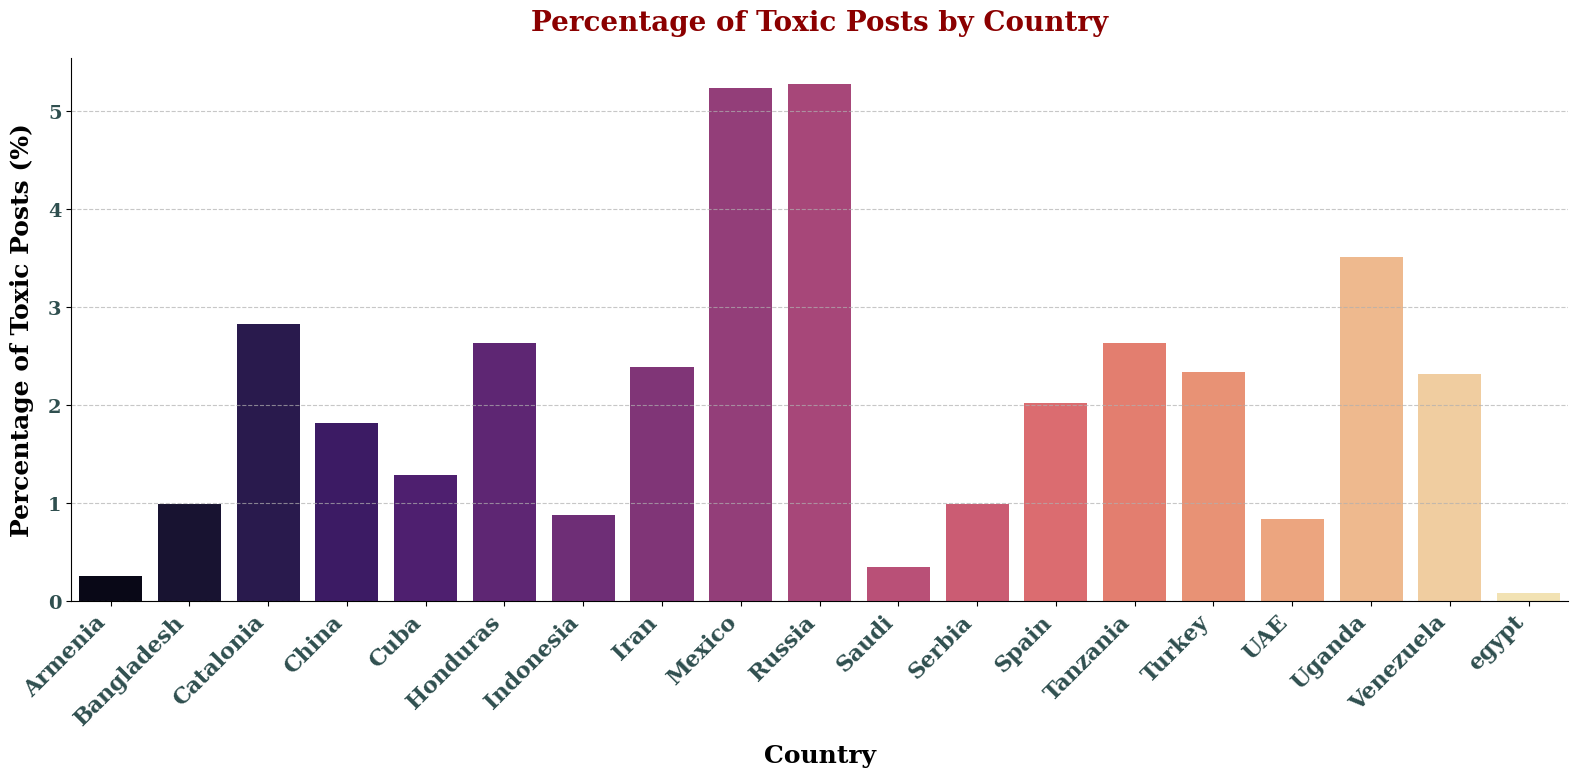

Country_Updated
Armenia       0.254085
Bangladesh    0.991501
Catalonia     2.825342
China         1.818869
Cuba          1.281107
Honduras      2.630772
Indonesia     0.874198
Iran          2.384285
Mexico        5.242070
Russia        5.284510
Name: count, dtype: float64


In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where Overall_toxic is 1 (toxic tweets)
df_toxic = df_valid_updated[df_valid_updated['Overall_toxic'] == 1]

# Count total posts per country (including both toxic and non-toxic posts)
total_country_counts = df_valid_updated['Country_Updated'].value_counts()

# Count toxic posts per country
toxic_country_counts = df_toxic['Country_Updated'].value_counts()

# Calculate the number of toxic posts for each country
country_toxic_percentage = (toxic_country_counts / total_country_counts) * 100

# Set a beautiful, modern font (use a built-in font or a custom one)
plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})  # Update font settings globally

# Set up a stylish, high-contrast color palette
plt.figure(figsize=(16, 8))
sns.barplot(x=country_toxic_percentage.index, y=country_toxic_percentage.values, palette="magma")  # "magma" for high contrast

# Add extra flair with customized ticks and labels
plt.xticks(rotation=45, ha="right", fontsize=16, fontweight='bold', color='darkslategray')
plt.yticks(fontsize=14, fontweight='bold', color='darkslategray')

# Beautify the axes labels and title with larger, elegant fonts
plt.xlabel("Country", fontsize=18, labelpad=10, fontweight='bold', color='black')
plt.ylabel("Percentage of Toxic Posts (%)", fontsize=18, labelpad=10, fontweight='bold', color='black')
plt.title("Percentage of Toxic Posts by Country", fontsize=20, pad=20, fontweight='bold', color='darkred')

# Add gridlines for readability and remove top and right spines for a cleaner look
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Adjust layout for the best aesthetic
plt.tight_layout()

# Show the plot
plt.show()

# Print top 10 countries with the highest percentage of toxic posts
print(country_toxic_percentage.head(10))


In [133]:
country_toxic_percentage.sort_values()

Country_Updated
egypt         0.075103
Armenia       0.254085
Saudi         0.346897
UAE           0.831645
Indonesia     0.874198
Bangladesh    0.991501
Serbia        0.992574
Cuba          1.281107
China         1.818869
Spain         2.019441
Venezuela     2.318343
Turkey        2.339977
Iran          2.384285
Honduras      2.630772
Tanzania      2.633648
Catalonia     2.825342
Uganda        3.517032
Mexico        5.242070
Russia        5.284510
Name: count, dtype: float64

In [135]:
df_valid_updated['Country_Updated'].value_counts()

Country_Updated
Saudi         21926672
Venezuela     10275358
China          5250954
Iran           5214603
Cuba           4564491
Russia         3342694
Serbia         1768131
UAE            1170452
Honduras       1049578
Indonesia       706705
Turkey          475261
Uganda          440940
egypt           209047
Armenia          68481
Spain            54421
Mexico           17970
Bangladesh        2824
Tanzania          2544
Catalonia         1168
Name: count, dtype: int64

In [131]:
toxic_country_counts

Country_Updated
Venezuela     238218
Russia        176645
Iran          124331
China          95508
Saudi          76063
Cuba           58476
Honduras       27612
Serbia         17550
Uganda         15508
Turkey         11121
UAE             9734
Indonesia       6178
Spain           1099
Mexico           942
Armenia          174
egypt            157
Tanzania          67
Catalonia         33
Bangladesh        28
Name: count, dtype: int64

In [128]:
df_valid_updated['Country_Updated'].value_counts()

Country_Updated
Saudi         21926672
Venezuela     10275358
China          5250954
Iran           5214603
Cuba           4564491
Russia         3342694
Serbia         1768131
UAE            1170452
Honduras       1049578
Indonesia       706705
Turkey          475261
Uganda          440940
egypt           209047
Armenia          68481
Spain            54421
Mexico           17970
Bangladesh        2824
Tanzania          2544
Catalonia         1168
Name: count, dtype: int64

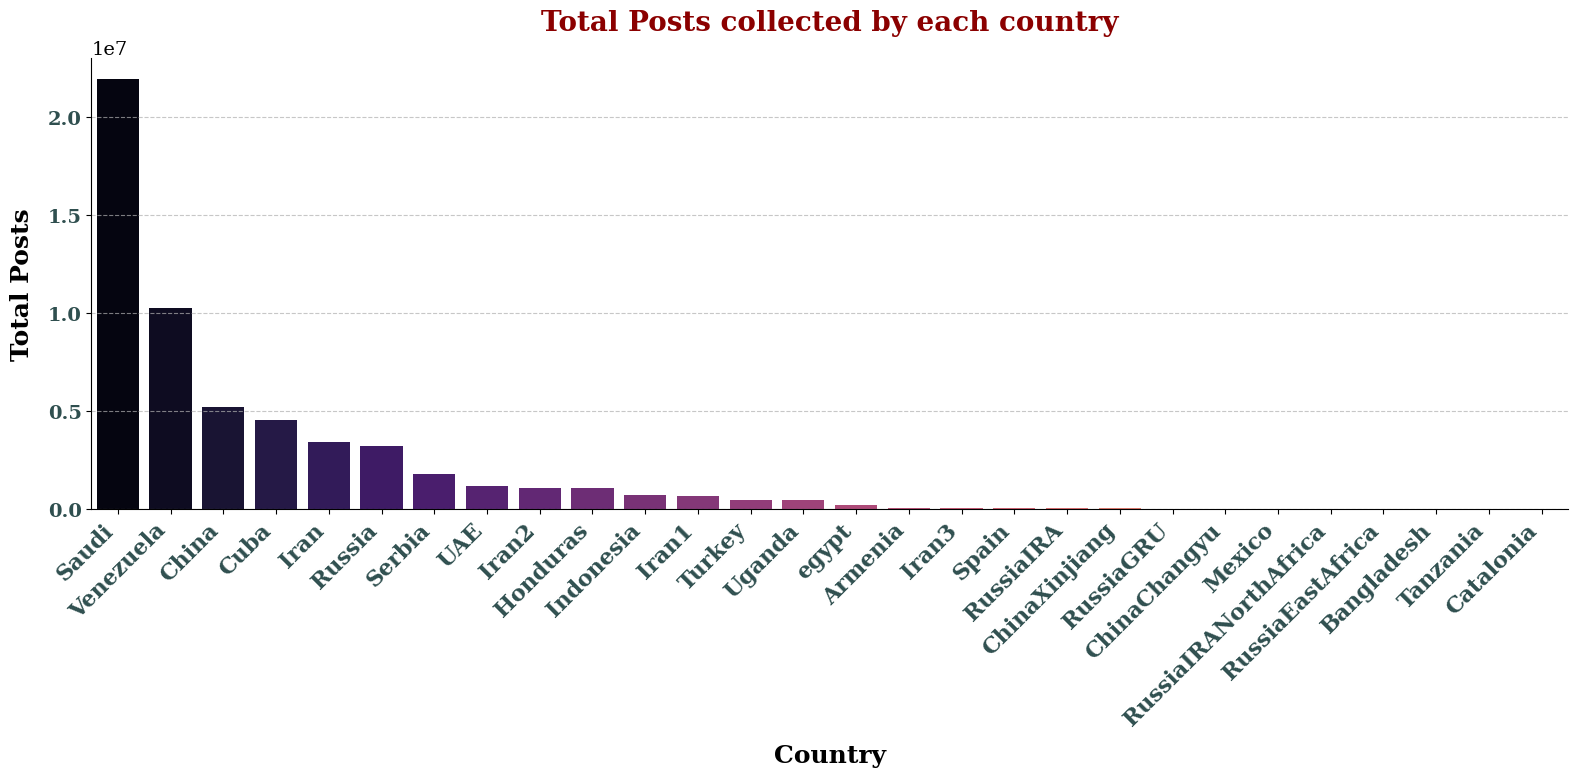

In [118]:
df_toxic = df_valid_updated[df_valid_updated['Overall_toxic'] == 1]
total_country_counts = df_valid_updated['country'].value_counts()
plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})  


plt.figure(figsize=(16, 8))
sns.barplot(x=total_country_counts.index, y=total_country_counts.values, palette="magma") 


plt.xticks(rotation=45, ha="right", fontsize=16, fontweight='bold', color='darkslategray')
plt.yticks(fontsize=14, fontweight='bold', color='darkslategray')


plt.xlabel("Country", fontsize=18, labelpad=10, fontweight='bold', color='black')
plt.ylabel("Total Posts", fontsize=18, labelpad=10, fontweight='bold', color='black')
plt.title("Total Posts collected by each country", fontsize=20, pad=20, fontweight='bold', color='darkred')


plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()



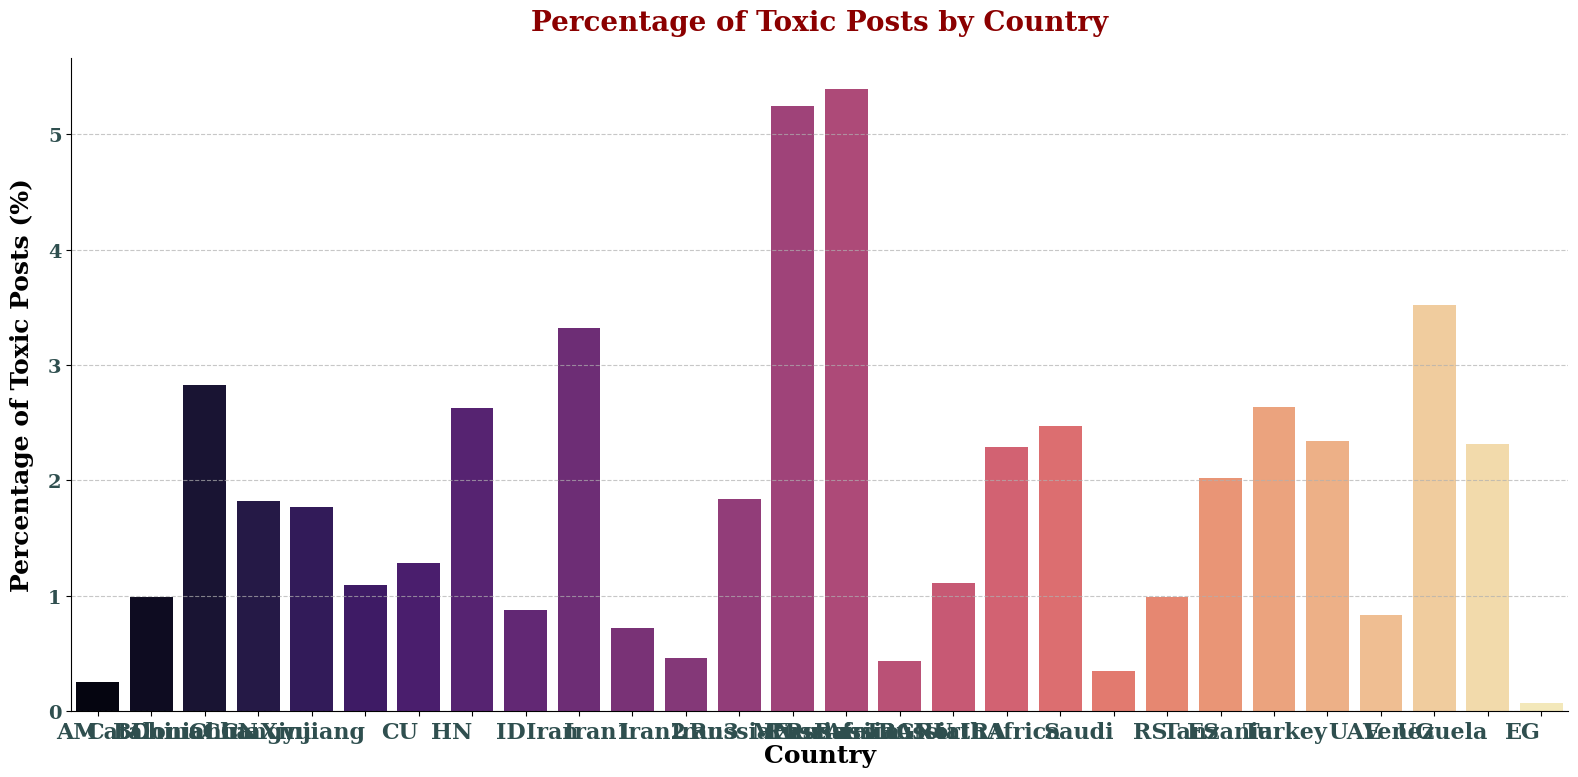

country
AM               0.254085
BD               0.991501
Catalonia        2.825342
CN               1.823086
ChinaChangyu     1.771521
ChinaXinjiang    1.094928
CU               1.281107
HN               2.630772
ID               0.874198
Iran             3.324260
Name: count, dtype: float64


In [119]:
def get_country_code(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_2
    except AttributeError:
        return country_name  


df_toxic = df_valid_updated[df_valid_updated['Overall_toxic'] == 1]
total_country_counts = df_valid_updated['country'].value_counts()


toxic_country_counts = df_toxic['country'].value_counts()
country_toxic_percentage = (toxic_country_counts / total_country_counts) * 100


country_toxic_percentage.index = country_toxic_percentage.index.map(get_country_code)
plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})  
plt.figure(figsize=(16, 8))
sns.barplot(x=country_toxic_percentage.index, y=country_toxic_percentage.values, palette="magma")  


plt.xticks(rotation=0, ha="right", fontsize=16, fontweight='bold', color='darkslategray')
plt.yticks(fontsize=14, fontweight='bold', color='darkslategray')


plt.xlabel("Country", fontsize=18, labelpad=0, fontweight='bold', color='black')
plt.ylabel("Percentage of Toxic Posts (%)", fontsize=18, labelpad=10, fontweight='bold', color='black')
plt.title("Percentage of Toxic Posts by Country", fontsize=20, pad=20, fontweight='bold', color='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()


plt.tight_layout()
plt.show()
print(country_toxic_percentage.head(10))


In [137]:
country_toxic_percentage

Country_Updated
Armenia       0.254085
Bangladesh    0.991501
Catalonia     2.825342
China         1.818869
Cuba          1.281107
Honduras      2.630772
Indonesia     0.874198
Iran          2.384285
Mexico        5.242070
Russia        5.284510
Saudi         0.346897
Serbia        0.992574
Spain         2.019441
Tanzania      2.633648
Turkey        2.339977
UAE           0.831645
Uganda        3.517032
Venezuela     2.318343
egypt         0.075103
Name: count, dtype: float64

# Tweet Size and all

In [160]:
df_toxic.loc[df_toxic.Country_Updated != 'egypt']

Tweet_ID     Toxic  Severe_Toxic  Profanity  \
5         1106620295530627072  0.602549      0.613575   0.440171   
16        1101419190899093504  0.379555      0.024679   0.136089   
104       1106532913963810816  0.557396      0.232233   0.265901   
136       1106184120043012101  0.787120      0.353682   0.394096   
138       1105728041429463042  0.528117      0.169603   0.265970   
...                       ...       ...           ...        ...   
59682860   954091046341718016  0.634275      0.290508   0.266177   
59682909   966654849541595137  0.426917      0.030524   0.163573   
59683004   963583992078487554  0.473235      0.023083   0.234704   
59683099   929045133433163777  0.426917      0.026937   0.171482   
59683132   974793714844434432  0.502472      0.023881   0.524926   

          Identity_Attack    Insult    Threat    country  Overall_toxic  \
5                0.619017  0.513094  0.348399     Turkey              1   
16               0.163731  0.091242  0.519571     Turkey              1   
104              0.505154  0.402434  0.441852     Turkey              1   
136              0.196933  0.741836  0.348043     Turkey              1   
138              0.093282  0.339986  0.449425     Turkey              1   
...                   ...       ...       ...        ...            ...   
59682860         0.210759  0.254041  0.661579  Venezuela              1   
59682909         0.336752  0.081632  0.538757  Venezuela              1   
59683004         0.505885  0.459662  0.025962  Venezuela              1   
59683099         0.079220  0.227703  0.516822  Venezuela              1   
59683132         0.041261  0.259987  0.010602  Venezuela              1   

         Country_Updated  
5                 Turkey  
16                Turkey  
104               Turkey  
136               Turkey  
138               Turkey  
...                  ...  
59682860       Venezuela  
59682909       Venezuela  
59683004       Venezuela  
59683099       Venezuela  
59683132       Venezuela  

[859287 rows x 10 columns]

In [139]:
valid_df.columns

Index(['Tweet_ID', 'Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack',
       'Insult', 'Threat', 'Source_File', 'tweetid', 'userid',
       'tweet_language', 'tweet_text', 'in_reply_to_tweetid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_tweetid', 'reply_count',
       'like_count', 'retweet_count', 'hashtags', 'urls', 'user_mentions',
       'tweet_type', 'char_length', 'word_count', 'country'],
      dtype='object')

In [ ]:
valid_df.groupby('country')

In [147]:
df_val_chek = pd.merge(df_toxic, valid_df, on = 'Tweet_ID')

In [145]:
valid_df.head()

Tweet_ID     Toxic  Severe_Toxic  Profanity  Identity_Attack  \
0  1121624378167271427  0.025675      0.002689   0.023653         0.005624   
1  1109578914110820352  0.009362      0.001812   0.016104         0.002349   
2  1100939420272869377  0.016713      0.001221   0.013849         0.005365   
3  1134172836346695680  0.011058      0.001650   0.019417         0.002368   
4  1121624351403417602  0.025675      0.002689   0.023653         0.005624   

     Insult    Threat                                  Source_File  \
0  0.010135  0.009386  Perspective_Result_Turkey_2020_06_Final.csv   
1  0.007038  0.006842  Perspective_Result_Turkey_2020_06_Final.csv   
2  0.010097  0.006978  Perspective_Result_Turkey_2020_06_Final.csv   
3  0.008349  0.006557  Perspective_Result_Turkey_2020_06_Final.csv   
4  0.010135  0.009386  Perspective_Result_Turkey_2020_06_Final.csv   

               tweetid                                        userid  ...  \
0  1121624378167271427                                    2383396185  ...   
1  1109578914110820352                                    2383396185  ...   
2  1100939420272869377                                    2383396185  ...   
3  1134172836346695680  T4EKoz1t80S1NTvw0jUvXYcDUdNfGN+KFH0hVY2BSEY=  ...   
4  1121624351403417602                                    2383396185  ...   

  reply_count like_count  retweet_count      hashtags urls  \
0           0          0              0            []   []   
1           0          0              0            []   []   
2           0          0              0  ['Colombia']   []   
3           0          0              0            []   []   
4           0          0              0            []   []   

                                       user_mentions tweet_type char_length  \
0  ['ihBEi15ImJ+EaOhNrVfNRBlqTER2AoW9RLgtbfbiv4='...    retweet        55.0   
1  ['ihBEi15ImJ+EaOhNrVfNRBlqTER2AoW9RLgtbfbiv4='...    retweet        49.0   
2                         ['164325147', '447667853']    retweet       110.0   
3                             ['730748614490923008']      reply         9.0   
4  ['ihBEi15ImJ+EaOhNrVfNRBlqTER2AoW9RLgtbfbiv4='...    retweet        55.0   

  word_count country  
0        2.0  Turkey  
1        2.0  Turkey  
2       21.0  Turkey  
3        2.0  Turkey  
4        2.0  Turkey  

[5 rows x 26 columns]

In [ ]:
df_val_chek.loc[df_val_chek.country!= 'egypt']

# IO User Count

In [151]:
valid_df.country.unique()

array(['Turkey', 'Iran', 'Serbia', 'Catalonia', 'Russia', 'Indonesia',
       'China', 'Bangladesh', 'ChinaXinjiang', 'Venezuela', 'Cuba',
       'RussiaIRANorthAfrica', 'ChinaChangyu', 'RussiaGRU', 'UAE',
       'Saudi', 'egypt', 'Tanzania', 'Honduras', 'RussiaIRA', 'Spain',
       'Iran1', 'RussiaEastAfrica', 'Armenia', 'Uganda', 'Iran3', 'Iran2',
       'Mexico'], dtype=object)

In [155]:
valid_df.columns

Index(['Tweet_ID', 'Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack',
       'Insult', 'Threat', 'Source_File', 'tweetid', 'userid',
       'tweet_language', 'tweet_text', 'in_reply_to_tweetid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_tweetid', 'reply_count',
       'like_count', 'retweet_count', 'hashtags', 'urls', 'user_mentions',
       'tweet_type', 'char_length', 'word_count', 'country'],
      dtype='object')

In [161]:
# Mapping of extended names to base country names
country_mapping = {
    'ChinaXinjiang': 'China',
    'ChinaChangyu': 'China',
    'RussiaIRA': 'Russia',
    'RussiaIRANorthAfrica': 'Russia',
    'RussiaGRU': 'Russia',
    'RussiaEastAfrica': 'Russia',
    'Iran1': 'Iran',
    'Iran2': 'Iran',
    'Iran3': 'Iran',
    'egypt': 'Egypt'  # Fixing capitalization
}

# Apply the mapping
valid_df['country_map'] = valid_df['country'].replace(country_mapping)


/tmp/ipykernel_63636/1353853109.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['country_map'] = valid_df['country'].replace(country_mapping)


In [153]:
len(valid_df.loc[valid_df.country == 'Iran'].userid.unique())

2848

In [154]:
for i in valid_df.country.unique():
    print(f"Country: {i} and total user {len(valid_df.loc[valid_df.country == i].userid.unique())}")
    

Country: Turkey and total user 4251
Country: Iran and total user 2848
Country: Serbia and total user 7478
Country: Catalonia and total user 59
Country: Russia and total user 1355
Country: Indonesia and total user 641
Country: China and total user 5174
Country: Bangladesh and total user 8
Country: ChinaXinjiang and total user 2016
Country: Venezuela and total user 1859
Country: Cuba and total user 502
Country: RussiaIRANorthAfrica and total user 31
Country: ChinaChangyu and total user 111
Country: RussiaGRU and total user 51
Country: UAE and total user 3606
Country: Saudi and total user 4820
Country: egypt and total user 240
Country: Tanzania and total user 134
Country: Honduras and total user 2994
Country: RussiaIRA and total user 22
Country: Spain and total user 216
Country: Iran1 and total user 313
Country: RussiaEastAfrica and total user 11
Country: Armenia and total user 31
Country: Uganda and total user 388
Country: Iran3 and total user 1019
Country: Iran2 and total user 203
Count

In [156]:
valid_df['Overall_toxic'] = valid_df[['Toxic', 'Severe_Toxic', 'Profanity', 
                                                      'Identity_Attack', 'Insult', 'Threat']].max(axis=1) > threshold

/tmp/ipykernel_63636/3856481611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['Overall_toxic'] = valid_df[['Toxic', 'Severe_Toxic', 'Profanity',


In [162]:
valid_df.columns

Index(['Tweet_ID', 'Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack',
       'Insult', 'Threat', 'Source_File', 'tweetid', 'userid',
       'tweet_language', 'tweet_text', 'in_reply_to_tweetid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_tweetid', 'reply_count',
       'like_count', 'retweet_count', 'hashtags', 'urls', 'user_mentions',
       'tweet_type', 'char_length', 'word_count', 'country', 'Overall_toxic',
       'country_map'],
      dtype='object')

In [178]:
valid_df_without_EG = valid_df.loc[valid_df.country_map!='Egypt']

In [272]:
# Group by country and toxicity
char_stats = valid_df_without_EG.groupby(['country_map', 'Overall_toxic'])['char_length'].mean().unstack()

# Rename columns for clarity
char_stats.columns = ['Non-Toxic Avg Char Length', 'Toxic Avg Char Length']

# Optional: sort by a specific column (e.g., Toxic)
char_stats = char_stats.sort_values(by='Toxic Avg Char Length', ascending=False)

print(char_stats)

             Non-Toxic Avg Char Length  Toxic Avg Char Length
country_map                                                  
Cuba                        109.949134             122.430523
Mexico                      111.321882             118.457537
Spain                       108.917368             111.829845
Armenia                     115.577349             106.137931
Iran                         92.204719              97.261136
Uganda                       95.184275              97.193835
Russia                       76.152548              92.019997
UAE                          93.708901              91.904233
Venezuela                    85.174953              88.393251
Honduras                     97.511182              83.900804
Turkey                       60.833621              72.911519
Serbia                       74.659163              72.762507
Catalonia                    84.620264              71.787879
Tanzania                     93.736375              71.701493
China   

In [273]:
# Group by country and toxicity
word_stats = valid_df_without_EG.groupby(['country_map', 'Overall_toxic'])['word_count'].mean().unstack()

# Rename columns for clarity
word_stats.columns = ['Non-Toxic Avg word_count', 'Toxic Avg word_count']

# Optional: sort by a specific column (e.g., Toxic)
word_stats = word_stats.sort_values(by='Toxic Avg word_count', ascending=False)

print(word_stats)

             Non-Toxic Avg word_count  Toxic Avg word_count
country_map                                                
Mexico                      18.402748             20.183652
Cuba                        16.378064             18.984232
Spain                       17.729150             18.200182
Uganda                      15.308751             17.387606
Iran                        14.127983             15.842300
UAE                         14.666173             15.239827
Honduras                    15.621454             14.838367
Venezuela                   13.015219             14.172735
Russia                      11.310605             13.667780
Serbia                      11.802843             12.447863
Tanzania                    14.206298             12.402985
Catalonia                   14.407930             12.393939
China                        9.032333             12.198186
Armenia                     11.521074             11.666667
Turkey                       8.947120   

In [274]:
char_stats

Non-Toxic Avg Char Length  Toxic Avg Char Length
country_map                                                  
Cuba                        109.949134             122.430523
Mexico                      111.321882             118.457537
Spain                       108.917368             111.829845
Armenia                     115.577349             106.137931
Iran                         92.204719              97.261136
Uganda                       95.184275              97.193835
Russia                       76.152548              92.019997
UAE                          93.708901              91.904233
Venezuela                    85.174953              88.393251
Honduras                     97.511182              83.900804
Turkey                       60.833621              72.911519
Serbia                       74.659163              72.762507
Catalonia                    84.620264              71.787879
Tanzania                     93.736375              71.701493
China                        55.529433              68.347046
Bangladesh                   72.633763              63.642857
Indonesia                    78.376153              60.335869
Saudi                        78.603694              55.431789

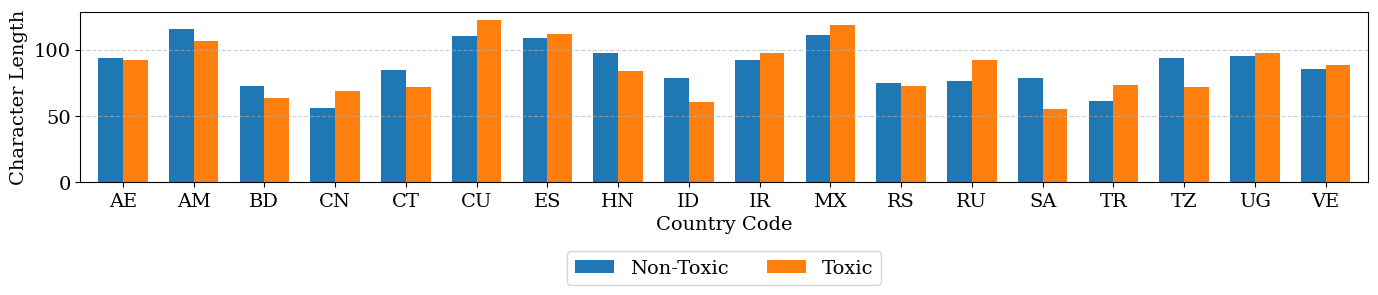

In [293]:
char_stats = valid_df_without_EG.groupby(['country_map', 'Overall_toxic'])['char_length'].mean().unstack()

char_stats.columns = ['Non-Toxic Avg Char Length', 'Toxic Avg Char Length']

char_stats = char_stats.sort_values(by='Toxic Avg Char Length', ascending=False)


char_stats.columns = ['Non-Toxic', 'Toxic']

country_codes = {
    'Armenia': 'AM', 'Bangladesh': 'BD', 'Catalonia': 'CT', 'China': 'CN',
    'Cuba': 'CU', 'Honduras': 'HN', 'Indonesia': 'ID',
    'Iran': 'IR', 'Mexico': 'MX', 'Russia': 'RU', 'Saudi': 'SA', 
    'Serbia': 'RS', 'Spain': 'ES', 'Tanzania': 'TZ', 'Turkey': 'TR',
    'UAE': 'AE', 'Uganda': 'UG', 'Venezuela': 'VE'
}


char_stats = char_stats.copy()
char_stats['country_code'] = char_stats.index.map(lambda x: country_codes.get(x.strip(), ''))

char_stats = char_stats[char_stats['country_code'] != '']

char_stats.set_index('country_code', inplace=True)
char_stats.sort_index(inplace=True)

ax = char_stats.plot(kind='bar', figsize=(14, 3.5), width=0.7)

plt.xlabel('Country Code')
plt.ylabel('Character Length')
plt.xticks(rotation=0)
plt.legend(
    #title='Toxicity',
    labels=['Non-Toxic', 'Toxic'],
    loc='upper center',
    bbox_to_anchor=(0.5, -.35),
    ncol=2
)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



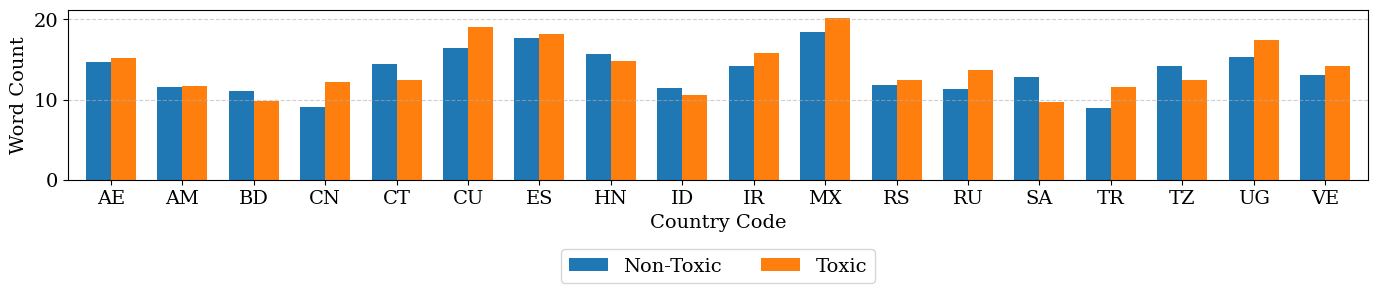

In [291]:
word_stats = valid_df_without_EG.groupby(['country_map', 'Overall_toxic'])['word_count'].mean().unstack()
word_stats.columns = ['Non-Toxic Avg word_count', 'Toxic Avg word_count']


country_codes = {
    'Armenia': 'AM', 'Bangladesh': 'BD', 'Catalonia': 'CT', 'China': 'CN',
    'Cuba': 'CU', 'Egypt': 'EG', 'Honduras': 'HN', 'Indonesia': 'ID',
    'Iran': 'IR', 'Mexico': 'MX', 'Russia': 'RU', 'Saudi': 'SA', 
    'Serbia': 'RS', 'Spain': 'ES', 'Tanzania': 'TZ', 'Turkey': 'TR',
    'UAE': 'AE', 'Uganda': 'UG', 'Venezuela': 'VE'
}

word_stats['country_code'] = word_stats.index.map(lambda x: country_codes.get(x.strip(), ''))


word_stats = word_stats[word_stats['country_code'] != '']


word_stats.set_index('country_code', inplace=True)
word_stats = word_stats.sort_index()

# Plot
ax = word_stats.plot(kind='bar', figsize=(14, 3.5), width=0.7)

plt.xlabel('Country Code')
plt.ylabel('Word Count')
plt.xticks(rotation=0)
plt.legend(
    #title='Toxicity',
    labels=['Non-Toxic', 'Toxic'],
    loc='upper center',
    bbox_to_anchor=(0.5, -.35),
    ncol=2
)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [211]:

overall_char_length_stats = valid_df_without_EG.groupby('Overall_toxic')['char_length'].mean()

overall_word_count_stats = valid_df_without_EG.groupby('Overall_toxic')['word_count'].mean()


print("Overall Avg Character Length for Non-Toxic and Toxic Tweets:")
print(overall_char_length_stats)

print("\nOverall Avg Word Count for Non-Toxic and Toxic Tweets:")
print(overall_word_count_stats)


char_stats['Overall Non-Toxic Avg char_length'] = overall_char_length_stats.get('Non-Toxic', 0)
char_stats['Overall Toxic Avg char_length'] = overall_char_length_stats.get('Toxic', 0)


word_stats['Overall Non-Toxic Avg word_count'] = overall_word_count_stats.get('Non-Toxic', 0)
word_stats['Overall Toxic Avg word_count'] = overall_word_count_stats.get('Toxic', 0)

print("\nUpdated Char Stats with Overall Values:")
print(char_stats)

print("\nUpdated Word Stats with Overall Values:")
print(word_stats)


Overall Avg Character Length for Non-Toxic and Toxic Tweets:
Overall_toxic
False    81.905486
True     86.989196
Name: char_length, dtype: float64

Overall Avg Word Count for Non-Toxic and Toxic Tweets:
Overall_toxic
False    12.841080
True     14.028012
Name: word_count, dtype: float64

Updated Char Stats with Overall Values:
               Non-Toxic       Toxic country_code  \
country_code                                        
AE             93.708901   91.904233           MX   
AM            115.577349  106.137931           CU   
BD             72.633763   63.642857           ES   
CN             55.529433   68.347046           UG   
CT             84.620264   71.787879           IR   
CU            109.949134  122.430523           AE   
ES            108.917368  111.829845           HN   
HN             97.511182   83.900804           VE   
ID             78.376153   60.335869           RU   
IR             92.204719   97.261136           RS   
MX            111.321882  118.45753

In [212]:
df_toxic

Tweet_ID     Toxic  Severe_Toxic  Profanity  \
5         1106620295530627072  0.602549      0.613575   0.440171   
16        1101419190899093504  0.379555      0.024679   0.136089   
104       1106532913963810816  0.557396      0.232233   0.265901   
136       1106184120043012101  0.787120      0.353682   0.394096   
138       1105728041429463042  0.528117      0.169603   0.265970   
...                       ...       ...           ...        ...   
59682860   954091046341718016  0.634275      0.290508   0.266177   
59682909   966654849541595137  0.426917      0.030524   0.163573   
59683004   963583992078487554  0.473235      0.023083   0.234704   
59683099   929045133433163777  0.426917      0.026937   0.171482   
59683132   974793714844434432  0.502472      0.023881   0.524926   

          Identity_Attack    Insult    Threat    country  Overall_toxic  \
5                0.619017  0.513094  0.348399     Turkey              1   
16               0.163731  0.091242  0.519571     Turkey              1   
104              0.505154  0.402434  0.441852     Turkey              1   
136              0.196933  0.741836  0.348043     Turkey              1   
138              0.093282  0.339986  0.449425     Turkey              1   
...                   ...       ...       ...        ...            ...   
59682860         0.210759  0.254041  0.661579  Venezuela              1   
59682909         0.336752  0.081632  0.538757  Venezuela              1   
59683004         0.505885  0.459662  0.025962  Venezuela              1   
59683099         0.079220  0.227703  0.516822  Venezuela              1   
59683132         0.041261  0.259987  0.010602  Venezuela              1   

         Country_Updated  
5                 Turkey  
16                Turkey  
104               Turkey  
136               Turkey  
138               Turkey  
...                  ...  
59682860       Venezuela  
59682909       Venezuela  
59683004       Venezuela  
59683099       Venezuela  
59683132       Venezuela  

[859444 rows x 10 columns]

In [ ]:
threshold = 0.5

valid_df['Overall_toxic'] = valid_df[['Toxic', 'Severe_Toxic', 'Profanity', 
                                                      'Identity_Attack', 'Insult', 'Threat']].max(axis=1) > threshold

valid_df['Overall_toxic'] = valid_df['Overall_toxic'].astype(int)

In [ ]:
valid_df[['country', 'Overall_toxic', 'char_length', 'word_count', 'like_count', 'retweet_count', 'reply_count']].groupby(['country', 'Overall_toxic']).mean()

In [ ]:
valid_df.columns

In [ ]:
valid_df[['country', 'Overall_toxic', 'char_length', 'word_count', 'like_count', 'retweet_count', 'reply_count']].dtypes

In [ ]:
# Convert columns to float, setting invalid values to NaN
cols_to_convert = ['like_count', 'retweet_count', 'reply_count']
for col in cols_to_convert:
    valid_df[col] = pd.to_numeric(valid_df[col], errors='coerce')

# Remove rows with NaN values in these columns
valid_df2 = valid_df.dropna(subset=cols_to_convert)


In [ ]:
len(valid_df2)

In [ ]:
len(valid_df)

In [ ]:
valid_df[['country', 'Overall_toxic', 'char_length', 'word_count', 'like_count', 'retweet_count', 'reply_count']].groupby(['country', 'Overall_toxic']).mean()

In [ ]:
valid_df[['country', 'Overall_toxic', 'char_length', 'word_count', 'like_count', 'retweet_count', 'reply_count']].groupby( 'Overall_toxic').mean()

In [ ]:
valid_df[['country', 'Overall_toxic', 'char_length', 'word_count', 'like_count', 'retweet_count', 'reply_count']].groupby( 'Country').mean()

In [217]:
#valid_df_without_EG

In [220]:
df_toxic_update = pd.merge(df_toxic[['Tweet_ID', 'country', 'Overall_toxic', 'Country_Updated']], valid_df_without_EG, on = 'Tweet_ID')

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Step 1: Count total and toxic tweets per country
toxicity_stats = valid_df.groupby('country_map')['Overall_toxic'].value_counts().unstack().fillna(0)
toxicity_stats.columns = ['Non-Toxic', 'Toxic']
toxicity_stats['Total'] = toxicity_stats['Non-Toxic'] + toxicity_stats['Toxic']
toxicity_stats['Toxic %'] = (toxicity_stats['Toxic'] / toxicity_stats['Total']) * 100
toxicity_stats = toxicity_stats.sort_values(by='Toxic %', ascending=False)
toxicity_stats.reset_index(inplace=True)


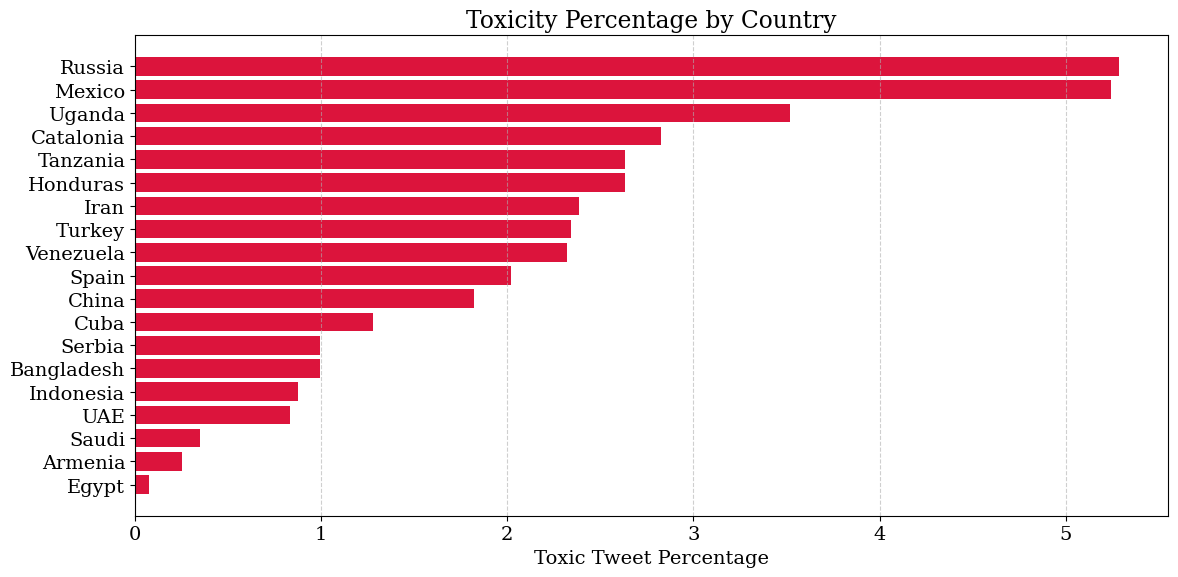

In [224]:
plt.figure(figsize=(12, 6))
plt.barh(toxicity_stats['country_map'], toxicity_stats['Toxic %'], color='crimson')
plt.xlabel('Toxic Tweet Percentage')
plt.title('Toxicity Percentage by Country')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [227]:
# Full ISO3 mapping
country_to_iso = {
    'Bangladesh': 'BGD',
    'China': 'CHN',
    'ChinaChangyu': 'CHN',
    'ChinaXinjiang': 'CHN',
    'Russia': 'RUS',
    'RussiaIRA': 'RUS',
    'RussiaGRU': 'RUS',
    'RussiaIRANorthAfrica': 'RUS',
    'RussiaEastAfrica': 'RUS',
    'Iran': 'IRN',
    'Iran1': 'IRN',
    'Iran2': 'IRN',
    'Iran3': 'IRN',
    'Venezuela': 'VEN',
    'Cuba': 'CUB',
    'UAE': 'ARE',
    'Saudi': 'SAU',
    'Egypt': 'EGY',
    'Tanzania': 'TZA',
    'Honduras': 'HND',
    'Spain': 'ESP',
    'Catalonia': 'ESP',
    'Serbia': 'SRB',
    'Turkey': 'TUR',
    'Indonesia': 'IDN',
    'Mexico': 'MEX',
    'Uganda': 'UGA',
    'Armenia': 'ARM'
}

# Filter only countries that appear in the dataset
present_countries = toxicity_stats['country_map'].unique()
filtered_country_to_iso = {k: v for k, v in country_to_iso.items() if k in present_countries}

# Map ISO3 codes
toxicity_stats['ISO3'] = toxicity_stats['country_map'].map(filtered_country_to_iso)
toxicity_stats = toxicity_stats.dropna(subset=['ISO3'])  # Remove rows without ISO codes


In [228]:
import plotly.express as px

fig = px.choropleth(
    toxicity_stats,
    locations='ISO3',
    color='Toxic %',
    hover_name='country_map',
    color_continuous_scale='Reds',
    title='Toxicity Intensity by Country (Dataset Only)'
)
fig.update_geos(showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


# Length

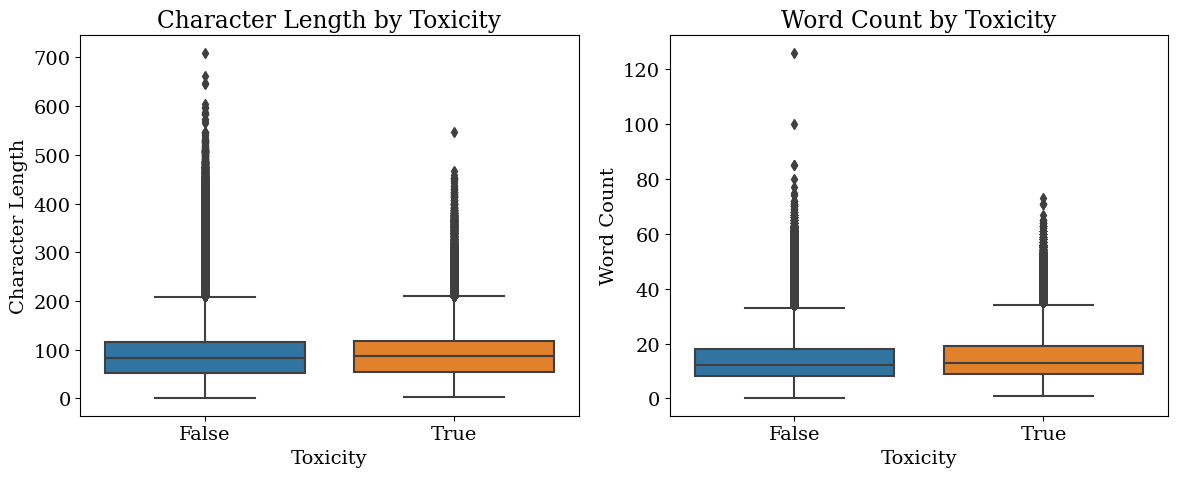

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Character Length
plt.subplot(1, 2, 1)
sns.boxplot(data=valid_df_without_EG, x='Overall_toxic', y='char_length')
plt.title('Character Length by Toxicity')
plt.xlabel('Toxicity')
plt.ylabel('Character Length')

# Word Count
plt.subplot(1, 2, 2)
sns.boxplot(data=valid_df_without_EG, x='Overall_toxic', y='word_count')
plt.title('Word Count by Toxicity')
plt.xlabel('Toxicity')
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()


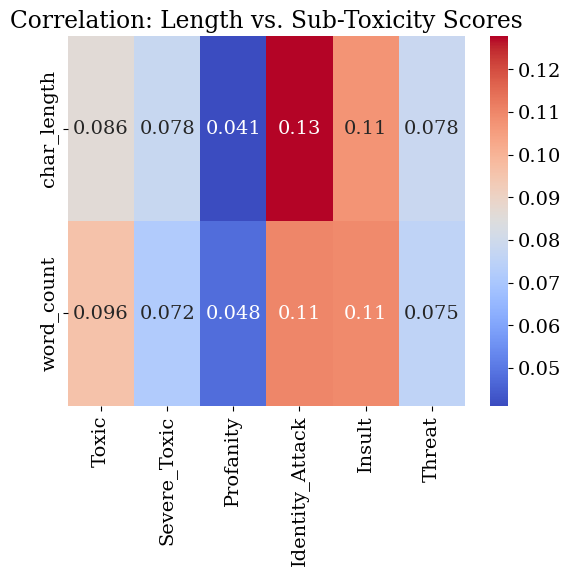

In [240]:
# Correlation matrix
subtox_cols = ['Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack', 'Insult', 'Threat']
length_cols = ['char_length', 'word_count']
corr_matrix = valid_df[subtox_cols + length_cols].corr()

sns.heatmap(corr_matrix.loc[length_cols, subtox_cols], annot=True, cmap='coolwarm')
plt.title("Correlation: Length vs. Sub-Toxicity Scores")
plt.show()


In [241]:
valid_df_without_EG.columns

Index(['Tweet_ID', 'Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack',
       'Insult', 'Threat', 'Source_File', 'tweetid', 'userid',
       'tweet_language', 'tweet_text', 'in_reply_to_tweetid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_tweetid', 'reply_count',
       'like_count', 'retweet_count', 'hashtags', 'urls', 'user_mentions',
       'tweet_type', 'char_length', 'word_count', 'country', 'Overall_toxic',
       'country_map'],
      dtype='object')

In [265]:
valid_df_without_EG.to_pickle('Final_Check_HT_Short.pkl')

In [263]:
valid_df_without_EG.columns

Index(['Tweet_ID', 'Toxic', 'Severe_Toxic', 'Profanity', 'Identity_Attack',
       'Insult', 'Threat', 'Source_File', 'tweetid', 'userid',
       'tweet_language', 'tweet_text', 'in_reply_to_tweetid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_tweetid', 'reply_count',
       'like_count', 'retweet_count', 'hashtags', 'urls', 'user_mentions',
       'tweet_type', 'char_length', 'word_count', 'country', 'Overall_toxic',
       'country_map', 'has_hashtag', 'has_url'],
      dtype='object')

In [302]:
len(valid_df_without_EG)

56333247

# Other

In [303]:
valid_df_without_EG['like_count'] = pd.to_numeric(valid_df_without_EG['like_count'], errors='coerce').astype('Int64')
valid_df_without_EG['reply_count'] = pd.to_numeric(valid_df_without_EG['reply_count'], errors='coerce').astype('Int64')
valid_df_without_EG['retweet_count'] = pd.to_numeric(valid_df_without_EG['retweet_count'], errors='coerce').astype('Int64')

/tmp/ipykernel_63636/1689319534.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_63636/1689319534.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_63636/1689319534.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [304]:
valid_df_without_EG['Total_Engagement'] = valid_df_without_EG['like_count']  + valid_df_without_EG['reply_count'] + valid_df_without_EG['retweet_count']

/tmp/ipykernel_63636/399365119.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the metric list
metrics = ['like_count', 'retweet_count', 'reply_count']
ylabels = ['Like Count', 'Retweet Count', 'Reply Count']
#colors = ['#4daf4a', '#e41a1c']

# Country to code mapping
country_codes = {
    'Armenia': 'AM', 'Bangladesh': 'BD', 'Catalonia': 'CT', 'China': 'CN',
    'Cuba': 'CU', 'Honduras': 'HN', 'Indonesia': 'ID', 'Iran': 'IR',
    'Mexico': 'MX', 'Russia': 'RU', 'Saudi': 'SA', 'Serbia': 'RS',
    'Spain': 'ES', 'Tanzania': 'TZ', 'Turkey': 'TR', 'UAE': 'AE',
    'Uganda': 'UG', 'Venezuela': 'VE'
}

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 8), dpi=1200)

for i, metric in enumerate(metrics):
    # Group and reshape
    stats = valid_df_without_EG.groupby(['country_map', 'Overall_toxic'])[metric].mean().unstack()
    stats.columns = ['Non-Toxic', 'Toxic']
    
    # Map country names to codes
    stats['country_code'] = stats.index.map(lambda x: country_codes.get(x.strip(), ''))
    stats = stats[stats['country_code'] != '']
    stats.set_index('country_code', inplace=True)
    stats.sort_index(inplace=True)
    
    # Plot
    stats.plot(kind='bar', width=0.7, logy=True, ax=axes[i])
    
    #axes[i].set_xlabel('Country Code', fontsize=14)
    axes[i].set_ylabel(ylabels[i], fontsize=14)
    axes[i].set_xticks(range(len(stats)))
    axes[i].set_xticklabels(stats.index, rotation=0, fontsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend(title='Toxicity', fontsize=12, title_fontsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("combined_toxicity_log.png", dpi=1200)
plt.show()


In [308]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the metric list
metrics = ['like_count', 'retweet_count', 'reply_count']
ylabels = ['Like Count', 'Retweet Count', 'Reply Count']

# Country to code mapping
country_codes = {
    'Armenia': 'AM', 'Bangladesh': 'BD', 'Catalonia': 'CT', 'China': 'CN',
    'Cuba': 'CU', 'Honduras': 'HN', 'Indonesia': 'ID', 'Iran': 'IR',
    'Mexico': 'MX', 'Russia': 'RU', 'Saudi': 'SA', 'Serbia': 'RS',
    'Spain': 'ES', 'Tanzania': 'TZ', 'Turkey': 'TR', 'UAE': 'AE',
    'Uganda': 'UG', 'Venezuela': 'VE'
}

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 8), dpi=1200)

# To collect handles and labels for shared legend
legend_handles, legend_labels = None, None

for i, metric in enumerate(metrics):
    # Group and reshape
    stats = valid_df_without_EG.groupby(['country_map', 'Overall_toxic'])[metric].mean().unstack()
    stats.columns = ['Non-Toxic', 'Toxic']

    # Map country names to codes
    stats['country_code'] = stats.index.map(lambda x: country_codes.get(x.strip(), ''))
    stats = stats[stats['country_code'] != '']
    stats.set_index('country_code', inplace=True)
    stats.sort_index(inplace=True)

    # Plot
    ax = stats.plot(kind='bar', width=0.7, logy=True, ax=axes[i], legend=False)
    
    axes[i].set_ylabel(ylabels[i], fontsize=14)
    axes[i].set_xticks(range(len(stats)))
    axes[i].set_xticklabels(stats.index, rotation=0, fontsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    
    # Save legend handles/labels from the first plot
    if i == 0:
        legend_handles, legend_labels = ax.get_legend_handles_labels()

# Shared legend at the center bottom
fig.legend(legend_handles, legend_labels, title="", title_fontsize=14,
           fontsize=12, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
plt.savefig("combined_toxicity_log.png", dpi=1200, bbox_inches='tight')
plt.show()